### Vivek Dadhich

### 20MAI0077

### Repository-link -> https://github.com/vivek20dadhich/CSE6037-Deep-Learning-and-its-Applications-Lab-Assignments

### Task 1 -> Implement perceptron on given data without using buitin functions and predict output for test data
<br /><br />

In [54]:
import numpy as np

In [55]:
#     x0  x1  x2
x = [[1, 2, 3],                                  
     [4, 5, 6],                                 
     [7, 8, 9]] 

# Desired outputs
y = [0,                                            
     1,                                            
     1]

In [56]:
# Training the Perceptron
# x:   feature data 
# y:   outputs 
# z:   threshold
# eta: learning rate
# t:   number of iterations

def perceptron_train(x, y, z, eta, t):
    
    # Initializing parameters for the Perceptron
    w = np.zeros(len(x[0]))        # weights 
    n = 0                          
    
    # Initializing additional parameters to compute SSE
    yhat_vec = np.ones(len(y))     # vector for predictions
    errors = np.ones(len(y))       # vector for errors (actual - predictions)
    J = []                         # vector for the SSE cost function
     
        
    while n < t:                                  
        for i in range(0, len(x)):                 
            
            # summation step
            f = np.dot(x[i], w)                      
                        
            # activation function
            if f > z:                               
                yhat = 1.                               
            else:                                   
                yhat = 0. 
            yhat_vec[i] = yhat                              
        
            # updating the weights
            for j in range(0, len(w)):             
                w[j] = w[j] + eta*(y[i]-yhat)*x[i][j]
                
            n += 1     
            
        # computing the sum-of-squared errors
        for i in range(0,len(y)):     
           errors[i] = (y[i]-yhat_vec[i])**2
        J.append(0.5*np.sum(errors))
           
    # function returns the weight vector, and sum-of-squared errors        
    return w, J


z = 0.0     # threshold
eta = 0.1   # learning rate
t = 50      # number of iterations

print("The weights are:")
print(perceptron_train(x, y, z, eta, t)[0], "\n")

print("The sum-of-squared erros are:")
print(perceptron_train(x, y, z, eta, t)[1])

The weights are:
[ 0.5  0.1 -0.3] 

The sum-of-squared erros are:
[0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Perceptron Convergence')

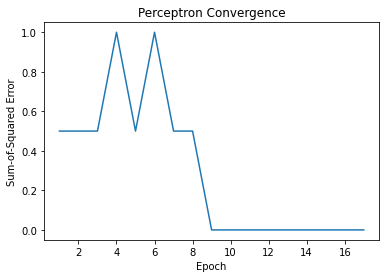

In [57]:
J = perceptron_train(x, y, z, eta, t)[1]     # pulling out the sum-of-squared errors from the tuple
epoch = np.linspace(1,len(J),len(J))

%matplotlib inline  
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

The weights are:
[ 2.5  0.5 -1.5] 

The sum-of-squared erros are:
[0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Perceptron Convergence')

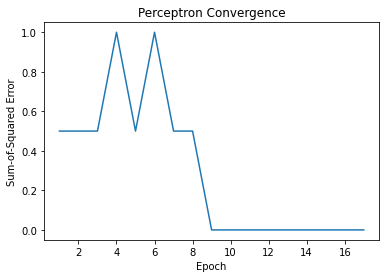

In [58]:
eta = 0.5     # new learning rate
z = 0.0

print("The weights are:")
print(perceptron_train(x, y, z, eta, t)[0], "\n")

J = perceptron_train(x, y, z, eta, t)[1]
epoch = np.linspace(1,len(J),len(J))
print("The sum-of-squared erros are:")
print(J)

%matplotlib inline
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

As we can see, the perceptron converges after the 8th iteration and SSE becomes 0 after that

In [59]:
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [60]:
dataset = [[4,7,8]]
weights = [2.5, 0.5, -1.5]
for row in dataset:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=8, Predicted=0


In [61]:
test_set = [[4,7,8]]
weights = [0.5, 0.1, -0.3]

In [62]:
# Prediction for [4, 7, 8]

predictions = list()
for row in test_set:
    prediction = predict(row, weights)
    predictions.append(prediction)
print(predictions)   

[0.0]
